In [1]:
import scipy.cluster.hierarchy as hca
import pandas as pd
import numpy as np
from pylab import *
from matplotlib import pyplot
%matplotlib inline
np.set_printoptions(suppress=True)
data=pd.read_csv("/dsa/data/DSA-8630/mini_project/pantheon-project/database.csv")
data.head()


,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.584


In [2]:
data1=data.drop(data.columns[[0,1,2,3,4,5,6,7,10,11,12]],axis=1)

In [3]:
data1.head()

,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index
0,40.33333,23.50000,152,56355172,370758,31.9938
1,37.96667,23.71667,142,46812003,329662,31.9888
2,32.50000,34.90000,214,60299092,281771,31.8981
3,37.96667,23.71667,137,40307143,294213,31.6521
4,40.80000,22.51667,138,48358148,350421,31.584


In [4]:
data1.isnull().any()

latitude                        True
longitude                       True
article_languages              False
page_views                     False
average_views                  False
historical_popularity_index    False
dtype: bool

In [5]:
for col in data1:
    print(col,data[col].dtypes)

latitude float64
longitude float64
article_languages object
page_views object
average_views object
historical_popularity_index object


In [6]:
data1['latitude']=data1['latitude'].fillna((data1['latitude'].mean()))
data1['longitude']=data1['longitude'].fillna((data1['longitude'].mean()))

In [7]:

num_data=data1.convert_objects(convert_numeric=True)

/usr/lib/python3.4/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


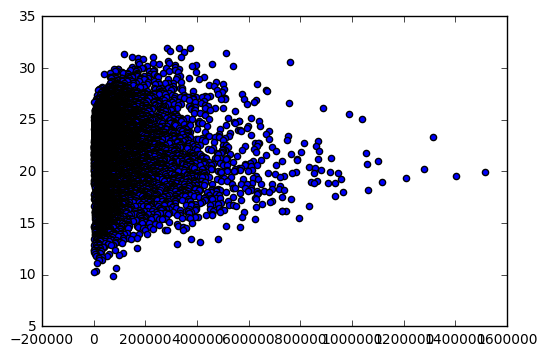

In [8]:
plt.scatter(num_data.iloc[:,4],num_data.iloc[:,5])
plt.show()

In [9]:
rows1 = pd.Series(data1.loc[data1['article_languages'] == "Not Provided"].index)
invalid_data1 = data1.loc[(rows1),]
#print(invalid_data1)
rows2 = pd.Series(data1.loc[data1['page_views'] == "Not Provided"].index)
invalid_data2 = data1.loc[(rows2),]
# print(invalid_data2)
rows3 = pd.Series(data1.loc[data1['average_views'] == "Not Provided"].index)
invalid_data3 =data1.loc[(rows3),]
# print(invalid_data3)
rows4 = pd.Series(data1.loc[data1['historical_popularity_index'] == "Not Provided"].index)
invalid_data4 = data1.loc[(rows4),]

invalid_data1 = invalid_data1.append(invalid_data2)
invalid_data1 = invalid_data1.append(invalid_data3)
invalid_data1 = invalid_data1.append(invalid_data4)

invalid_data1.drop_duplicates()

,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index
10262,35.11737,-89.97107,Not Provided,7130053,274233,16.9662
10579,-34.60333,-58.38167,Not Provided,2846258,94875,16.1673
10665,47.36667,8.55000,31,Not Provided,25973,15.9405
11323,40.40000,-3.68333,28,Not Provided,Not Provided,Not Provided
11335,51.91667,4.50000,27,Not Provided,21404,11.3956
11216,46.05556,14.50833,26,229486,8826,Not Provided
11321,-14.46667,132.26667,26,463947,17844,Not Provided


In [10]:
data1=data1.drop(data1.index[[11321,11216,11335,11323,10665,10579,10262]])

In [11]:
num_data=num_data.drop(num_data.index[[11312,11216,11335,11323,10665,10579,10262]])

In [12]:
z = hca.linkage(data1,'ward')

In [13]:
data1.isnull().sum()

latitude                       0
longitude                      0
article_languages              0
page_views                     0
average_views                  0
historical_popularity_index    0
dtype: int64

In [14]:
num_data.isnull().sum()

latitude                       0
longitude                      0
article_languages              0
page_views                     0
average_views                  0
historical_popularity_index    1
dtype: int64

In [15]:
num_data['historical_popularity_index'] = num_data['historical_popularity_index'].fillna((num_data['historical_popularity_index'].mean()))



In [16]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, cop_dist = cophenet(z, pdist(num_data))
c

0.65461174079192164

In [17]:
z[0]

array([ 1432.        ,  9945.        ,     9.37520639,     2.        ])

In [18]:
z[12]

array([  2227.       ,  10987.       ,     28.8583958,      2.       ])

In [19]:
num_data.loc[[1432, 9945], :]

,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index
1432,48.20083,16.32000,52.0,3752097.0,72156.0,25.5837
9945,50.06139,19.93833,52.0,3752094.0,72156.0,17.6881


In [20]:
num_data.loc[[2227,10987],:]

,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index
2227,52.93306,12.80000,37.0,1270613.0,34341.0,24.9718
10987,44.76667,17.18333,28.0,1975403.0,70550.0,14.9321


For indexes 1432,9945 the numbers are identical for articles_languages and average_views;for
page views and historical_popularity_index the numbers are pretty close.the algorithm did a goog job in this case even though our overall cophenetic correlation is 65.46%.
In our second example  coefficent the algorithm seems to cluster indexes 2227,10987 even though we can clearly observe major differences in the numbers across all columns(excluding latitude,longitude).

In [21]:
y=hca.linkage(num_data,metric="euclidean",method="ward")

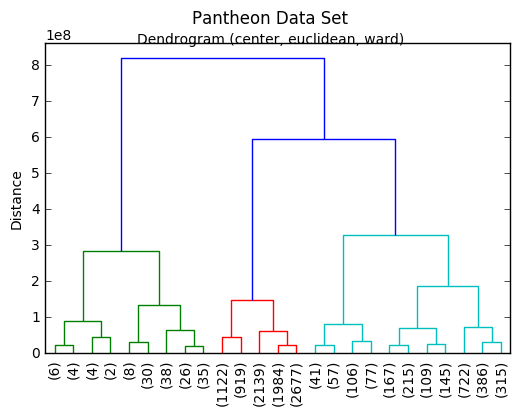

In [22]:
plt=hca.dendrogram(y,truncate_mode="lastp",p=25)
xticks(rotation=90)
ylabel("Distance")
figtext(0.5,0.95,"Pantheon Data Set",ha="center",fontsize=12)
figtext(0.5,0.90,"Dendrogram (center, euclidean, ward)",ha="center",fontsize=10)

In [23]:
from scipy.cluster.hierarchy import fcluster
k=5
clusters = fcluster(y, k, criterion='maxclust')
pd.value_counts(pd.Series(clusters))

3    8841
5    2059
4     281
2     137
1      16
dtype: int64

In [24]:
size(data)

192797

In [25]:
num_data["cluster"] = clusters
grouped = num_data.groupby('cluster')
cluster1 = num_data[num_data['cluster']==1]

In [26]:
cluster1

,latitude,longitude,article_languages,page_views,average_views,historical_popularity_index,cluster
5,43.78333,10.91667,174.0,88931135.0,511098.0,31.4644,1
14,48.25833,13.03500,169.0,128368798.0,759579.0,30.5778,1
17,52.19000,-1.71000,163.0,74882297.0,459401.0,30.4398,1
22,48.40000,9.98333,166.0,89771090.0,540790.0,30.2106,1
1506,41.59556,-87.34528,147.0,145250649.0,988100.0,25.5247,1
2020,37.75775,-87.11839,80.0,83016743.0,1037709.0,25.1155,1
2329,21.30000,-157.81667,200.0,112536577.0,562683.0,24.8890,1
3176,37.78333,-122.41667,122.0,78372660.0,642399.0,24.4062,1
5181,39.75806,-94.83667,83.0,108953700.0,1312695.0,23.2988,1
7470,32.69139,-16.94528,87.0,91677973.0,1053770.0,21.8203,1


In [27]:
#This is cluster 1 in the original data.
cluster1_data=data.iloc[[9097,8793,8656,8296,8048,8010,7470,5181,3176,2329,2020,1506,22,17,14,5]]
cluster1_data


,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
9097,23680998,Justin Bieber,Male,1994,London,NaN,Canada,North America,42.98370,-81.24970,Singer,Music,Arts,94,113558067,1208065,19.3922
8793,6844407,Selena Gomez,Female,1992,Grand Prairie,TX,United States,North America,32.71528,-97.01694,Singer,Music,Arts,96,87742946,913989,19.9708
8656,8135890,Miley Cyrus,Female,1992,Nashville,TN,United States,North America,36.16667,-86.78333,Actor,Film And Theatre,Arts,72,91947733,1277052,20.19
8296,2110323,Rihanna,Female,1988,Saint Michael Parish,NaN,Barbados,North America,13.11667,-59.60000,Singer,Music,Arts,85,89939558,1058112,20.7355
8048,17782843,Lady Gaga,Female,1986,New York,NY,United States,North America,40.71270,-74.00590,Musician,Music,Arts,133,104562647,786185,21.1045
8010,2150841,Lionel Messi,Male,1987,Rosario,NaN,Argentina,South America,-32.95000,-60.66667,Soccer Player,Team Sports,Sports,95,82454215,867939,21.1608
7470,623737,Cristiano Ronaldo,Male,1985,Santo António,NaN,Portugal,Europe,32.69139,-16.94528,Soccer Player,Team Sports,Sports,87,91677973,1053770,21.8203
5181,4429395,Eminem,Male,1972,Saint Joseph,MO,United States,North America,39.75806,-94.83667,Singer,Music,Arts,83,108953700,1312695,23.2988
3176,7412236,Steve Jobs,Male,1955,San Francisco-Bay Area,CA,United States,North America,37.78333,-122.41667,Designer,Design,Arts,122,78372660,642399,24.4062
2329,534366,Barack Obama,Male,1961,Honolulu,HI,United States,North America,21.30000,-157.81667,Politician,Government,Institutions,200,112536577,562683,24.889


In [28]:
num_data["cluster"] = clusters
grouped = num_data.groupby('cluster')
cluster2 = num_data[num_data['cluster']==2]

In [29]:
rows1 = pd.Series(num_data.loc[num_data['cluster']==2].index)
invalid_data1 = data.loc[(rows1),]
invalid_data1

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.584
7,15924,Julius Caesar,Male,-100,Rome,NaN,Italy,Europe,41.90000,12.50000,Politician,Government,Institutions,128,43088745,336631,31.1161
12,18934,Muhammad,Male,570,Mecca,NaN,Saudi Arabia,Asia,21.41667,39.81667,Religious Figure,Religion,Institutions,150,43026648,286844,30.65
15,33163,Wolfgang Amadeus Mozart,Male,1756,Salzburg,NaN,Austria,Europe,47.80000,13.03333,Composer,Music,Arts,177,51363334,290188,30.5146
18,21019,Michelangelo,Male,1475,Caprese Michelangelo,NaN,Italy,Europe,43.63333,11.98333,Painter,Fine Arts,Arts,158,39992803,253119,30.4383
20,69880,Napoleon Bonaparte,Male,1769,Corsica,NaN,France,Europe,41.92670,8.73690,Politician,Government,Institutions,145,57559307,396961,30.3263


Looking at some of the variables.There is no clear discernible pattern used by the algorithm to cluster the data.And again no wonder why the cophenetic correlation coefficient is .64.
The algorithm did not do a good job clustering this data.

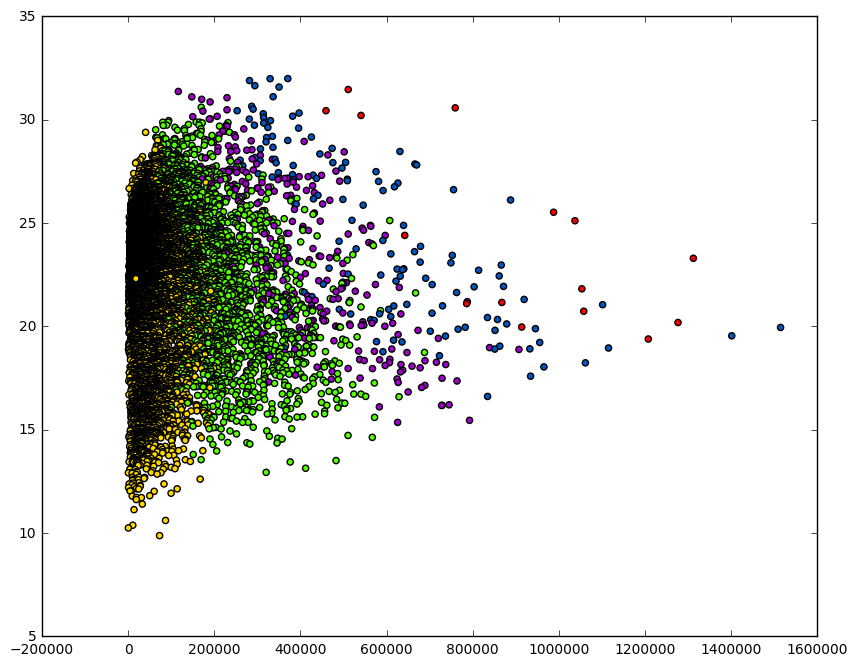

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(num_data.iloc[:,4], num_data.iloc[:,5], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

Looking at this visualization it is no wonder why cophenetic correlation  coefficient is 65.46%

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
data=num_data[['average_views','historical_popularity_index']]
data=data.as_matrix().astype('float32',copy=False)

In [32]:
stscaler = StandardScaler().fit(data)
data = stscaler.transform(data)

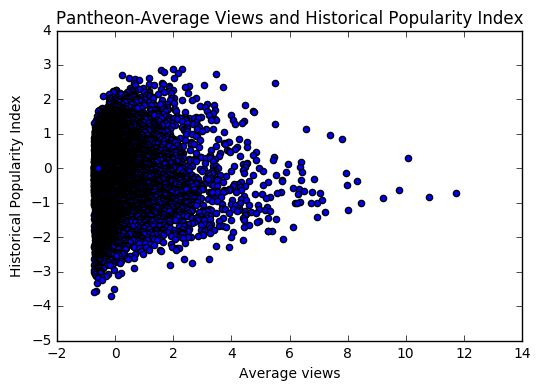

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(data[:,0], data[:,1])
plt.xlabel("Average views")
plt.ylabel("Historical Popularity Index")
plt.title("Pantheon-Average Views and Historical Popularity Index")

In [34]:
dbscan = DBSCAN(eps = .5, min_samples = 1500).fit(data)

In [35]:
import numpy as np

labels = dbscan.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbscan.core_sample_indices_] = True

In [36]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

/usr/lib64/python3.4/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


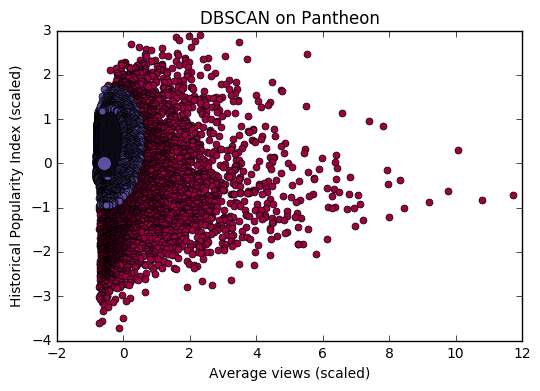

In [37]:
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = data[class_member_mask & core_samples]
    plt.plot(xy[:,0],xy[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = data[class_member_mask & ~core_samples]
    plt.plot(xy2[:,0],xy2[:,1], 'o', markerfacecolor = color, markersize = 5)
    
plt.title("DBSCAN on Pantheon")
plt.xlabel("Average views (scaled)")
plt.ylabel("Historical Popularity Index (scaled)")

the points with large average views figures tend to be classified as outliers.